In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer
# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

# for Q-Q plots
import scipy.stats as stats

In [2]:
df=pd.read_csv('data1/Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Droping null values rows

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df.shape

(4888, 20)

In [6]:
data=df.dropna()

In [7]:
data.shape

(4128, 20)

In [8]:
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## Mean, median, mode, max or min Imputation on null value

Mean / median imputation consists in replacing all occurrences of missing values (NA) in a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).

In [9]:
data1=df
data1_num=[fea for fea in data1.columns if data1[fea].dtype!='O']
data1_num

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

### Median Imputation

In [10]:
for var in data1_num:

    value = data1[var].median()

    data1[var] = data1[var].fillna(value)

In [11]:
data1.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [12]:
data1['TypeofContact'].dtypes

dtype('O')

### Mean Imputation

In [13]:
data1_mean=df
data1_mean_num=[fea for fea in data1_mean.columns if data1_mean[fea].dtype!='O']
data1_mean_num

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [14]:
for var in data1_mean_num:

    value = data1_mean[var].mean()

    data1_mean[var] = data1_mean[var].fillna(value)

### Mode Imputation

In [15]:
data1_mode=df
for var in data1_mode.columns:

    value = data1_mode[var].mode()[0]

    data1_mode[var] = data1_mode[var].fillna(value)

In [16]:
data1_mode.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [17]:
data1_mode

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [18]:
data1_mode['TypeofContact'].mode()[0]

'Self Enquiry'

In [19]:
data1_mode['TypeofContact']=data1_mode['TypeofContact'].fillna(data1_mode['TypeofContact'].mode())

In [20]:
data1_mode

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [21]:
data1_mode.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## Replacing missing values by a value at the end of the distribution

### End tail imputation with Feature Engine

In [22]:
df_end=df

# replace NA in indicated numerical variables
# using inter-quantal range proximity rule 
df_end_num=[fea for fea in df_end.columns if df_end[fea].dtype!='O']

for var in df_end_num:

    IQR = df_end[var].quantile(0.75) - df_end[var].quantile(0.25)
    value = df_end[var].quantile(0.75) + 1.5 * IQR

    df_end[var] = df_end[var].fillna(value)

In [23]:
df_end.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## Random Sample imputation

In [24]:
df_random=df

In [25]:
# repeat in a loop for the rest of the variables
# and for both train and test set

for var in df_random.columns:

    # extract a random sample
    random_sample = df_random[var].dropna().sample(df_random[var].isnull().sum(), random_state=0)


    # re index the random sample
    random_sample.index = df_random[df_random[var].isnull()].index

    # replace the NA 
    df_random.loc[df_random[var].isnull(), var] = random_sample
    
# check missing data
df_random.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## One-hot-encoding

In [26]:
df_end

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [27]:
df_end.loc[df_end['Gender'] =='Fe Male','Gender']='Female'

In [28]:
df_end['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
df_end_char=[fea for fea in df_end.columns if df_end[fea].dtype=='O']

In [30]:
df_end_char

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [31]:
df_end['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited'], dtype=object)

In [32]:
# let's one hot encode TypeofContact

tmp = pd.get_dummies(df_end['TypeofContact'])

print(tmp.head())

   Company Invited  Self Enquiry
0                0             1
1                1             0
2                0             1
3                1             0
4                0             1


In [33]:
# now let's encode all cateogrical variables together: df_end_char

df_end_enc = pd.get_dummies(df_end[df_end_char])

df_end_enc.head()

,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,ProductPitched_Basic,ProductPitched_Deluxe,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,1,0,0,0


### One Hot Encoding with Scikit-learn

In [34]:
# we create and train the encoder

encoder = OneHotEncoder(sparse=False)
# fit the encoder to the train set: it will learn the categories to encode

encoder.fit(df_end[df_end_char])

OneHotEncoder(sparse=False)

In [35]:
# transform the train and test sets

df_end_encoder = encoder.transform(df_end[df_end_char])
df_end_encoder_sci=pd.DataFrame(df_end_encoder)

In [36]:
df_end_encoder_sci.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Replacing categories by ordinal numbers

In [37]:
df_end

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [38]:
df['ProductPitched'].unique()

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [39]:
ProductPitched=['Basic','Standard','King','Deluxe','Super Deluxe']

In [40]:
# let's create a dictionary with the mappings of categories to numbers for ProductPitched
ordinal_mapping = {
    k: i for i, k in enumerate(ProductPitched, 0)
}

ordinal_mapping

{'Basic': 0, 'Standard': 1, 'King': 2, 'Deluxe': 3, 'Super Deluxe': 4}

In [41]:
# replace the labels with the integers

df_end['ProductPitched'] = df_end['ProductPitched'].map(ordinal_mapping)

In [42]:
df_end['ProductPitched'].unique()

array([3, 0, 1, 4, 2], dtype=int64)

In [43]:
df_end['Designation'].unique()

array(['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

In [44]:
Designation=['Manager','Senior Manager','AVP','VP','Executive']

In [45]:
# let's create a dictionary with the mappings of categories to numbers for Designation
ordinal_mapping = {
    k: i for i, k in enumerate(Designation, 0)
}

ordinal_mapping

{'Manager': 0, 'Senior Manager': 1, 'AVP': 2, 'VP': 3, 'Executive': 4}

In [46]:
# replace the labels with the integers

df_end['Designation'] = df_end['Designation'].map(ordinal_mapping)

In [47]:
df_end['Designation'].unique()

array([0, 4, 1, 2, 3], dtype=int64)

## logarithmic transformation

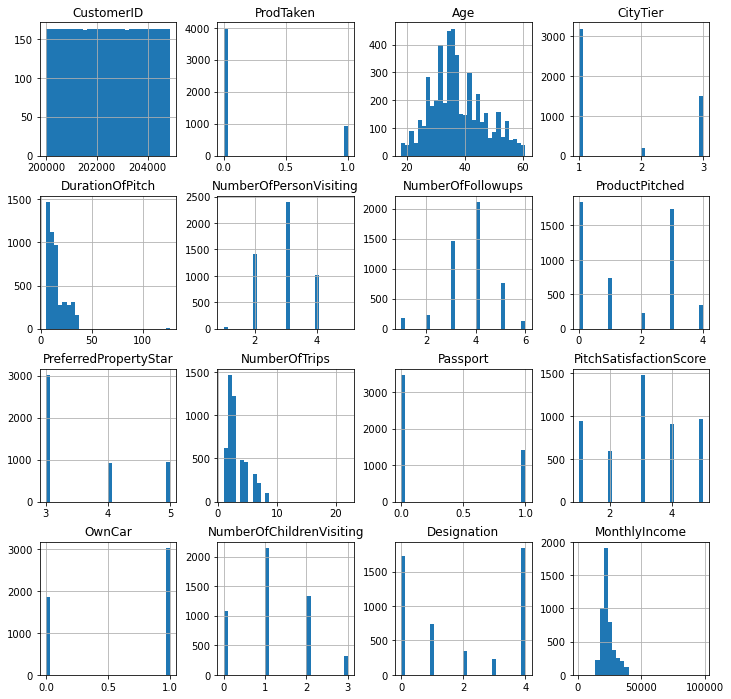

In [48]:
# plot the histogram to inspect variable distributions

df_end.hist(bins=30, figsize=(12,12))
plt.show()

In [49]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

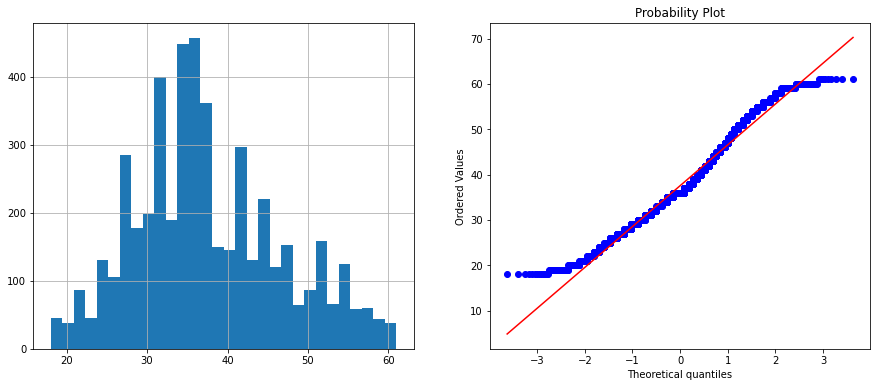

In [50]:
# check original distribution

diagnostic_plots(df_end, 'Age')

### Logarithmic transformation with NumPy

In [51]:
# make a copy of the dataframe where we will store the modified
# variables

data_tf = df_end.copy()

In [52]:
# apply log to a set of variables
data_tf[['Age']] = np.log(df_end[['Age']])

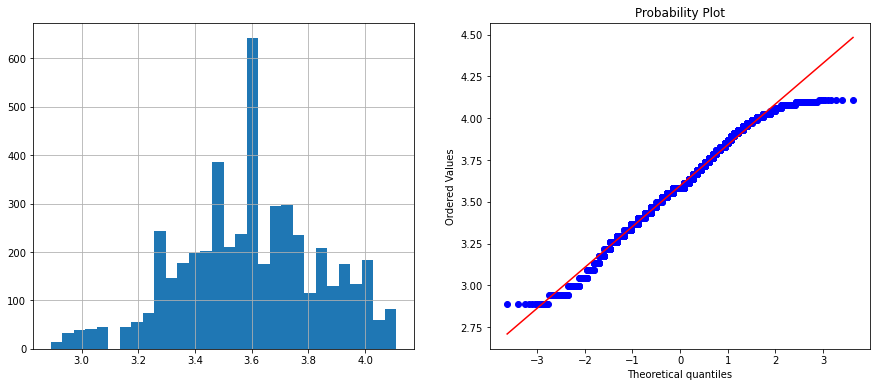

In [53]:
# use diagnostic plot function to address variable transformation

diagnostic_plots(data_tf, 'Age')

### Square / Cube root transformation with NumPy

In [54]:
# apply the square root transformation to a set of variables
data_tf[['Age']] = np.sqrt(df_end[['Age']])

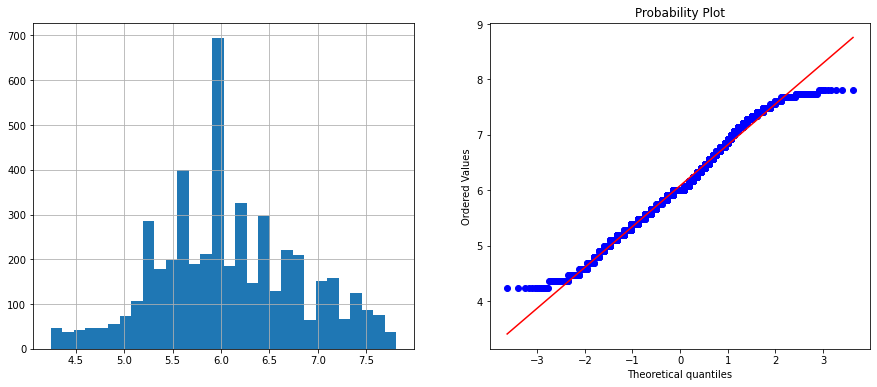

In [55]:
# plot to visualize the transformation (not in book)

diagnostic_plots(data_tf, 'Age')

### Reciprocal transformation with NumPy

In [56]:
# apply the square root transformation to a set of variables
data_tf[['Age']] = np.reciprocal(df_end[['Age']])

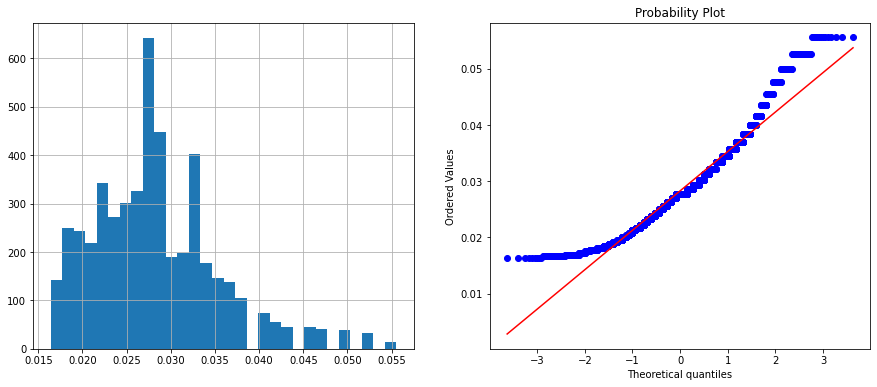

In [57]:
# plot to visualize the transformation (not in book)

diagnostic_plots(data_tf, 'Age')

### Exponential transformation with NumPy

In [58]:
# apply the square root transformation to a set of variables
data_tf[['Age']] = np.power(df_end[['Age']],0.3)

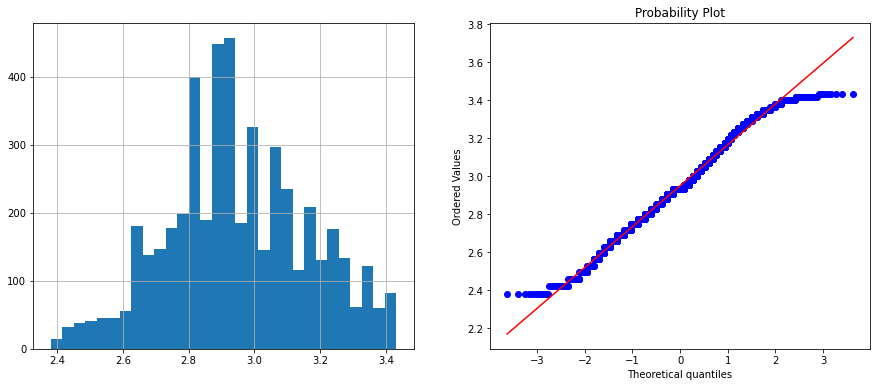

In [59]:
# plot to visualize the transformation (not in book)

diagnostic_plots(data_tf, 'Age')